#Scraping Data and process dataset

## Scrape and get 15.000 dirty dataset

In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bca.mybca.omni.android',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=15000,
    filter_score_with=None
)

In [ ]:
df_bca = pd.DataFrame(np.array(result),columns=['review'])
df_bca = df_bca.join(pd.DataFrame(df_bca.pop('review').tolist()))
df_bca.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,5f1a6798-876b-46e1-b47f-40d3d25d74dc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Buka rekening lewat aplikasi sistemnya ribet b...,1,23,2.4.1,2025-05-22 05:45:48,Terima kasih atas saran yang Bapak/Ibu sampaik...,2025-05-22 07:13:52,2.4.1
1,29f58612-21b7-4e11-b05a-8b5f18e1c98e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update malah jadi slow loadingnya (tia...,3,30,2.1.0,2025-03-07 05:54:18,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-03-07 06:00:31,2.1.0
2,1e28c1b6-6ab4-49e3-9979-c6a3db92d185,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saran pengembangan, tolong kembangin lagi buat...",4,52,2.3.1,2025-03-21 13:48:53,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-03-21 14:55:26,2.3.1
3,97991af0-da8e-4ce9-b982-716c9f471151,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong untuk setiap update aplikasi,agar tidak...",4,52,2.2.0,2025-03-14 10:30:28,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-03-14 11:31:05,2.2.0
4,a805ff72-f800-4640-905e-a763d99b6a3c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tiba-tiba ada keterangan untuk di pulihkan afl...,3,6,2.4.1,2025-05-19 23:12:25,"Mohon maaf atas kendala yang Bapak/Ibu alami, ...",2025-05-20 01:30:06,2.4.1


In [ ]:
df_bca.to_csv("sentiment_data_1.csv", index = False)

## Improt dataset to CSV

In [ ]:
len(df_bca.index)

15000

In [ ]:
df_bca[['userName', 'score','at', 'content']].head()

,userName,score,at,content
0,Pengguna Google,1,2025-05-22 05:45:48,Buka rekening lewat aplikasi sistemnya ribet b...
1,Pengguna Google,3,2025-03-07 05:54:18,Setelah update malah jadi slow loadingnya (tia...
2,Pengguna Google,4,2025-03-21 13:48:53,"Saran pengembangan, tolong kembangin lagi buat..."
3,Pengguna Google,4,2025-03-14 10:30:28,"Tolong untuk setiap update aplikasi,agar tidak..."
4,Pengguna Google,3,2025-05-19 23:12:25,tiba-tiba ada keterangan untuk di pulihkan afl...


In [ ]:
new_df = df_bca[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False)
sorted_df.head()

,userName,score,at,content
210,Pengguna Google,1,2025-05-24 05:43:12,"aplikasi apaan nh, udah jelek aplikasi nya mal..."
3392,Pengguna Google,4,2025-05-23 15:33:59,mudah dan bagus
1719,Pengguna Google,4,2025-05-23 15:29:09,peraktis gampang di pake pokonya top
212,Pengguna Google,2,2025-05-23 15:20:00,"mau daftar lagi aja susah banget, pesan SMS se..."
3381,Pengguna Google,4,2025-05-23 15:00:40,jangan kebanyakan update


In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']]

In [ ]:
my_df.head()

,userName,score,at,content
210,Pengguna Google,1,2025-05-24 05:43:12,"aplikasi apaan nh, udah jelek aplikasi nya mal..."
3392,Pengguna Google,4,2025-05-23 15:33:59,mudah dan bagus
1719,Pengguna Google,4,2025-05-23 15:29:09,peraktis gampang di pake pokonya top
212,Pengguna Google,2,2025-05-23 15:20:00,"mau daftar lagi aja susah banget, pesan SMS se..."
3381,Pengguna Google,4,2025-05-23 15:00:40,jangan kebanyakan update


In [ ]:
my_df.to_csv("scrapped_data.csv", index = False)

In [ ]:
df = pd.read_csv('scrapped_data.csv')
df.head()

,userName,score,at,content
0,Pengguna Google,1,2025-05-24 05:43:12,"aplikasi apaan nh, udah jelek aplikasi nya mal..."
1,Pengguna Google,4,2025-05-23 15:33:59,mudah dan bagus
2,Pengguna Google,4,2025-05-23 15:29:09,peraktis gampang di pake pokonya top
3,Pengguna Google,2,2025-05-23 15:20:00,"mau daftar lagi aja susah banget, pesan SMS se..."
4,Pengguna Google,4,2025-05-23 15:00:40,jangan kebanyakan update


## Determine Sentiment

In [ ]:
def determine_sentiment(df):
    if df['score'] == 1 :
        return 'very negative'
    elif df['score'] == 2 :
        return 'negative'
    elif df['score'] == 3 :
        return 'neutral'
    elif df['score'] == 4 :
        return 'positive'
    elif df['score'] == 5 :
        return 'very positive'

df['sentiment'] = df.apply(determine_sentiment, axis=1)

In [ ]:
df.head()

,userName,score,at,content,sentiment
0,Pengguna Google,1,2025-05-24 05:43:12,"aplikasi apaan nh, udah jelek aplikasi nya mal...",very negative
1,Pengguna Google,4,2025-05-23 15:33:59,mudah dan bagus,positive
2,Pengguna Google,4,2025-05-23 15:29:09,peraktis gampang di pake pokonya top,positive
3,Pengguna Google,2,2025-05-23 15:20:00,"mau daftar lagi aja susah banget, pesan SMS se...",negative
4,Pengguna Google,4,2025-05-23 15:00:40,jangan kebanyakan update,positive


In [ ]:
df_sort = df[['content', 'sentiment']]
df_sort.head()

,content,sentiment
0,"aplikasi apaan nh, udah jelek aplikasi nya mal...",very negative
1,mudah dan bagus,positive
2,peraktis gampang di pake pokonya top,positive
3,"mau daftar lagi aja susah banget, pesan SMS se...",negative
4,jangan kebanyakan update,positive


In [ ]:
df_sort.to_csv("sentiment_data_2.csv", index = False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Visulization

sentiment
very positive    552
very negative    464
neutral          119
positive         113
negative          95
Name: count, dtype: int64


<ipython-input-47-dbf93fbe28f2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df_2021, order=sentiment_order, palette=sentiment_colors)


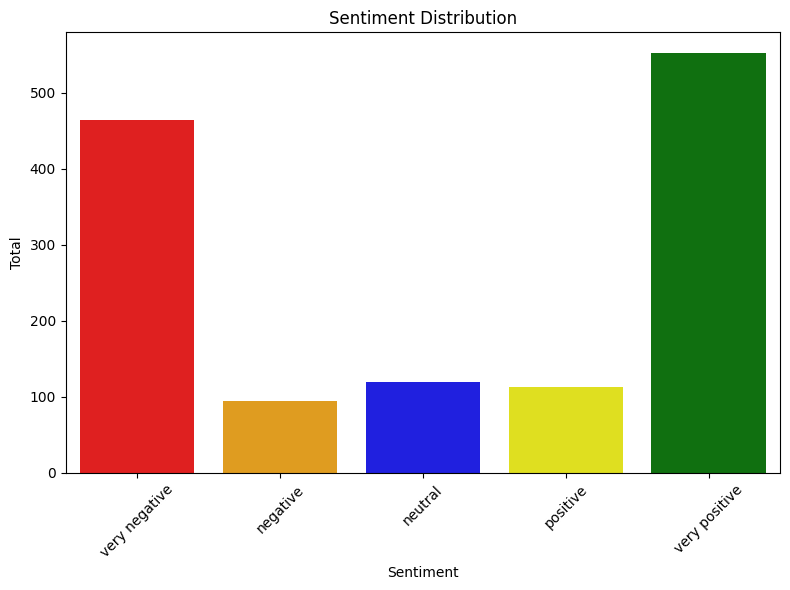

In [ ]:
df['at'] = pd.to_datetime(df['at'])
df_2021 = df[(df['at'] >= '2021-01-01') & (df['at'] <= '2021-12-31')]

sentiment_counts_2021 = df_2021['sentiment'].value_counts()
print(sentiment_counts_2021)

sentiment_order = ['very negative', 'negative', 'neutral', 'positive', 'very positive']
sentiment_colors = ['red', 'orange', 'blue', 'yellow', 'green']

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df_2021, order=sentiment_order, palette=sentiment_colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-48-73ab6f602125>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, order=sentiment_order, palette=sentiment_colors)


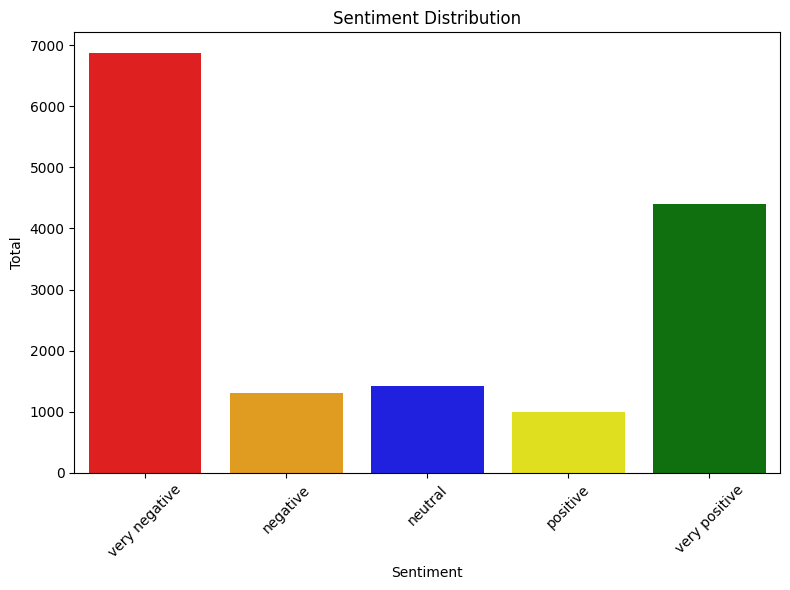

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_order = ['very negative', 'negative', 'neutral', 'positive', 'very positive']
sentiment_colors = ['red', 'orange', 'blue', 'yellow', 'green']

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, order=sentiment_order, palette=sentiment_colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Word Cloud of Sentiment

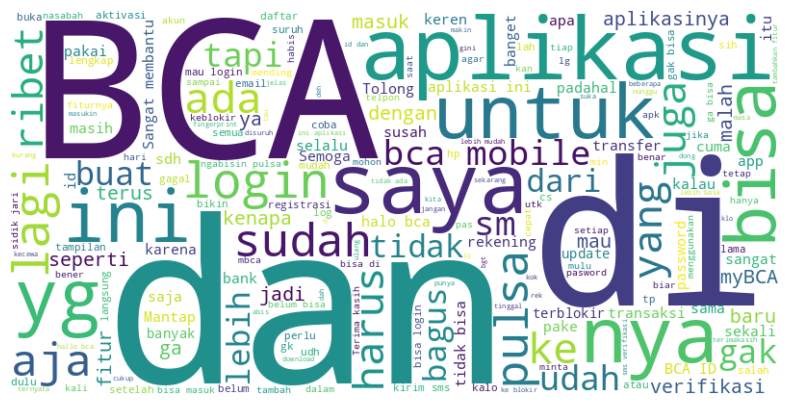

In [ ]:
# create the timeline
df['at'] = pd.to_datetime(df['at'])
df['at'] = df['at'].dt.date

#filter date where january untill desember 2021
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2021-12-31')

# Convert start_date and end_date to datetime.date objects for comparison
start_date_date = start_date.date()
end_date_date = end_date.date()

# Filter the DataFrame by comparing datetime.date objects
filtered_df = df[(df['at'] >= start_date_date) & (df['at'] <= end_date_date)]

# Join all the content strings into a single large string
all_content_text = ' '.join(filtered_df['content'])

# Generate the word cloud from the single string
wordcloud = WordCloud(width=800, height=400, background_color ='white', colormap='viridis').generate(all_content_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()